<a href="https://colab.research.google.com/github/anthony-illenden/mea705/blob/main/week1_f_plane_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Figure Size (Default is too small)
plt.rcParams["figure.figsize"] = (15, 9)

**Particle motion on the f-plane (constant Coriolis parameter)**

In [ ]:
#Establish arrays
n_t=200001 # number of timesteps
s_per_day= 86400. #seconds in a day
s_per_hour=3600.
t_days=6. #run time: days
t_sec = t_days*s_per_day
delta_t=t_sec/(n_t-1)
t=np.linspace(0.,t_sec,n_t) #time values: s
t_in_hours=t/s_per_hour
x=np.zeros(n_t)
y=np.zeros(n_t)
u=np.zeros(n_t)
v=np.zeros(n_t)
u_bal=np.zeros(n_t)
v_bal=np.zeros(n_t)

#Constants
f_coriolis=1.e-4 #Coriolis parameter: 1/s
force_y_mag=1.e-3 #imposed y-force magnitude: m/s^2
tau_force = .1 #time for turning on force: days
tau_force = tau_force*s_per_day #force turn on time: s
drag=1.e-5 #drag: 1/s

#Initial conditions: velocity of object at origin
u[0]=0.
v[0]=0.
x[0]=0.
y[0]=0.

#Step velocity forward in time
#First time step use forward step
force_y=0.
v[1]=v[0]+delta_t*((force_y-u[0]*f_coriolis)-drag*v[0])
u[1]=u[0]+delta_t*(v[0]*f_coriolis-drag*u[0])
#For i_t>1 use leapfrog
for i_t in range (2,n_t):
    time = i_t*delta_t
    if time <= tau_force:
      force_y=force_y_mag*.5*(1.-np.cos(np.pi*time/tau_force))
    else:
      force_y=force_y_mag
    v[i_t]=v[i_t-2]+2.*delta_t*((force_y-u[i_t-1]*f_coriolis))
    u[i_t]=u[i_t-2]+2.*delta_t*v[i_t-1]*f_coriolis
    u[i_t] = u[i_t]/(1.+delta_t*drag)
    v[i_t] = v[i_t]/(1.+delta_t*drag)

#Compute positions from velocities
for i_t in range (1,n_t):
    x[i_t]=x[i_t-1]+delta_t*u[i_t-1]
    y[i_t]=y[i_t-1]+delta_t*v[i_t-1]


Plots

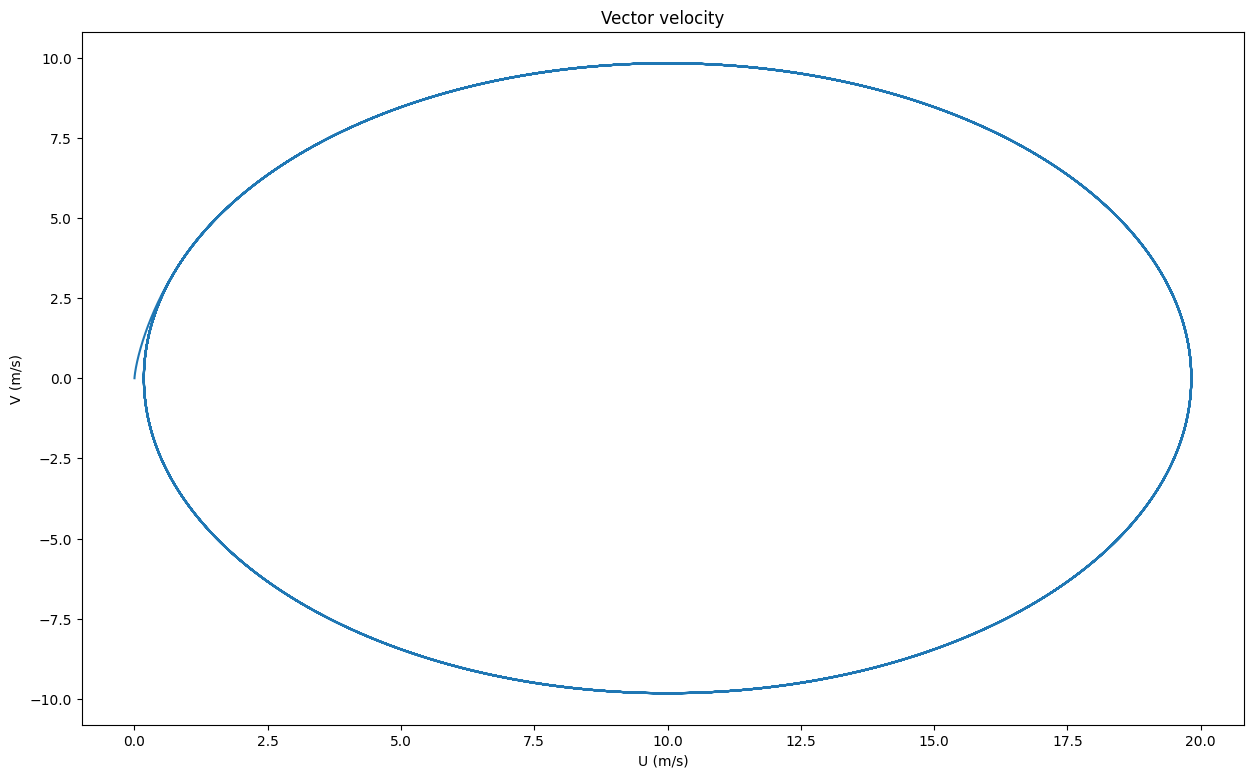

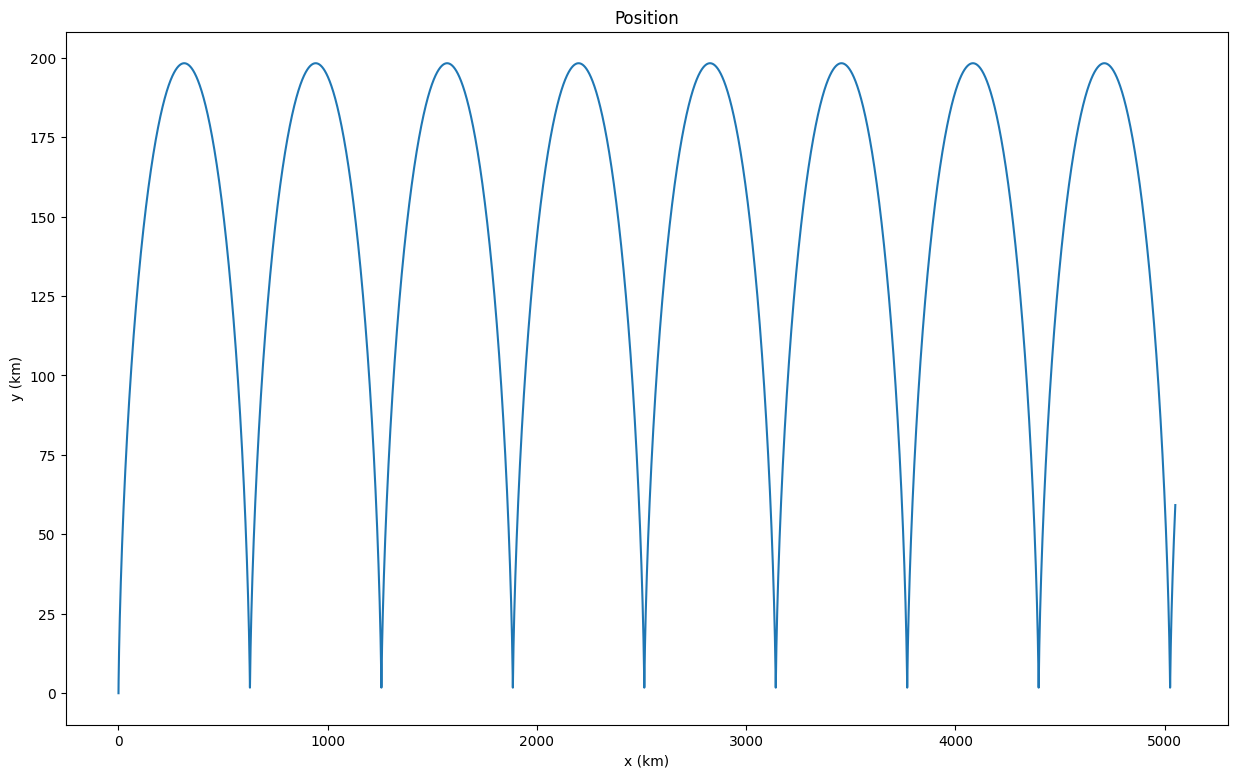

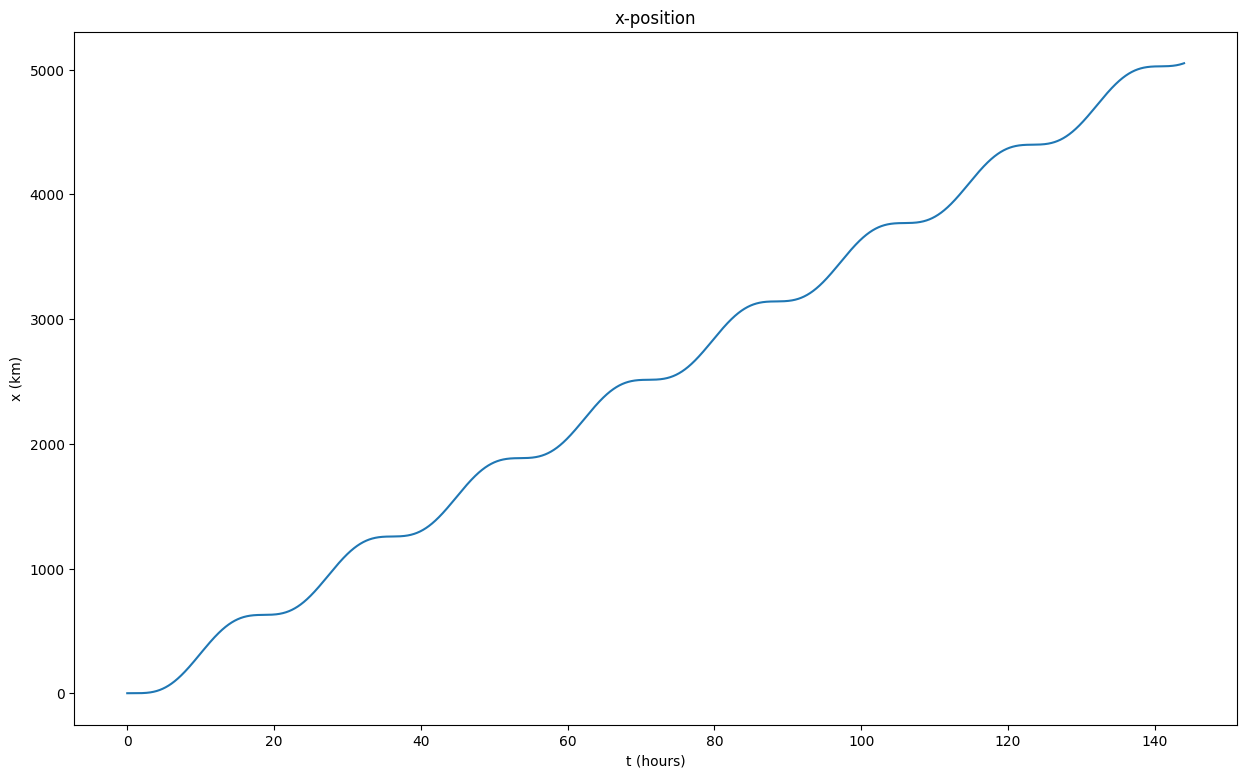

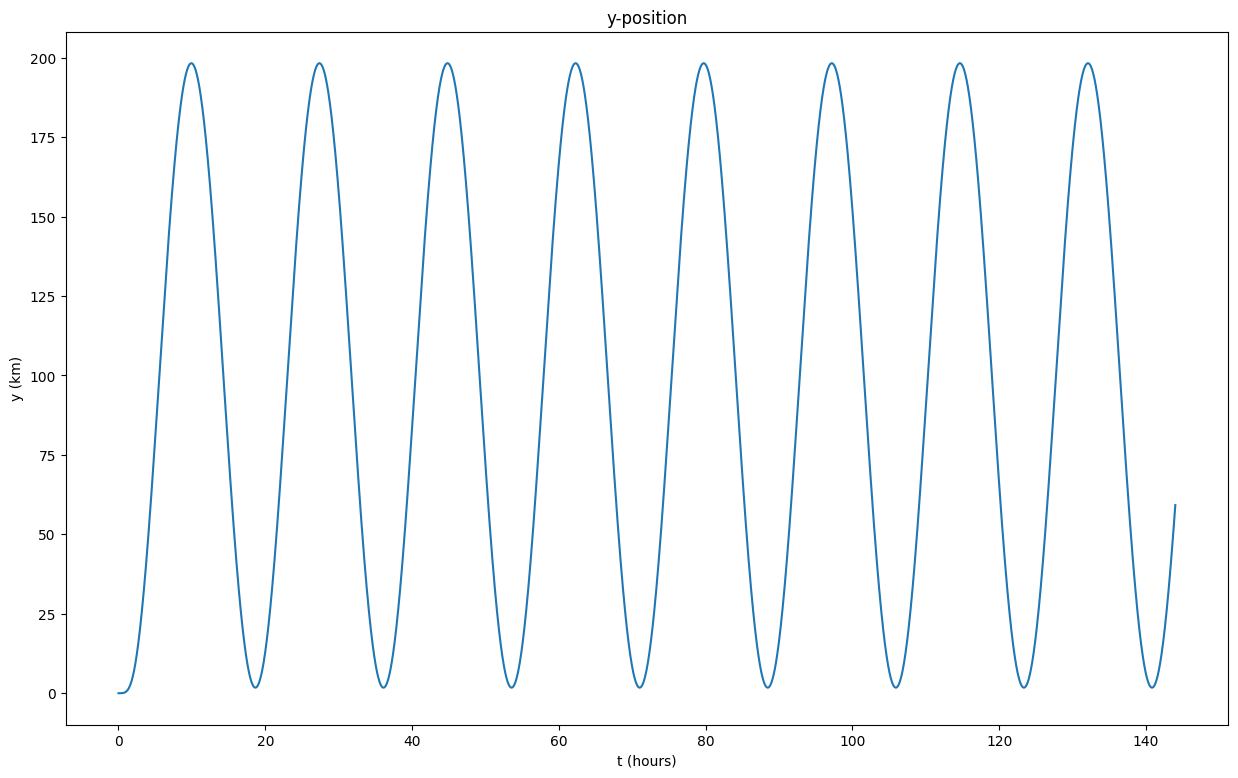

In [ ]:
#Evolution of vector velocity over time
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('V (m/s)')
ax1.set_xlabel('U (m/s)')
ax1.set_title('Vector velocity')
line, = ax1.plot(u,v)
plt.show()

#Trajectory
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.set_ylabel('y (km)')
ax2.set_xlabel('x (km)')
ax2.set_title('Position')
line, = ax2.plot(x*1.e-3,y*1.e-3)
plt.show()

#x versus time
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.set_ylabel('x (km)')
ax2.set_xlabel('t (hours)')
ax2.set_title('x-position')
line, = ax2.plot(t_in_hours,x*1.e-3)
plt.show()

#y versus time
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.set_ylabel('y (km)')
ax2.set_xlabel('t (hours)')
ax2.set_title('y-position')
line, = ax2.plot(t_in_hours,y*1.e-3)
plt.show()

**Trajectory of a particle moving without friction on the surface of a rotating sphere**

In [ ]:
#Establish arrays
n_t=50001 # number of timesteps
s_per_day= 86400. #seconds in a day
s_per_hour=3600.
t_days=10. #run time: days
t_sec = t_days*s_per_day
delta_t=t_sec/(n_t-1)
t=np.linspace(0.,t_sec,n_t) #time values: s
t_in_hours=t/s_per_hour
xlon=np.zeros(n_t)
xlat=np.zeros(n_t)
u=np.zeros(n_t)
v=np.zeros(n_t)

#Constants
Omega_E = 7.29e-5 #Angular velocity of Earth rotation: 1/s
Radius_E =  6.37e6 #Earth radius: m

#Initial conditions: velocity of object at initial longitude & latitude
u[0]=-20.
v[0]=0.
xlon[0]=0. #longitude in degrees
xlat[0]=45. #latitude in degrees

#Step velocity forward in time
#First time step use forward step
xlat_rad = xlat[0]*np.pi/180.
Coriolis =2.*Omega_E*np.sin(xlat_rad)
Tangent = np.tan(xlat_rad)/Radius_E
v[1]=v[0]+delta_t*((-u[0])*Coriolis\
    - u[0]**2*Tangent)
u[1]=u[0]+delta_t*(v[0]*Coriolis\
    + u[0]*v[0]*Tangent)

#Compute positions from velocities
Cosine = np.cos(xlat[0]*np.pi/180.)
xlon[1]=xlon[0]+180/np.pi*delta_t*u[0]/(Radius_E*Cosine)
xlat[1]=xlat[0]+180/np.pi*delta_t*v[0]/Radius_E

#For i>1 use leapfrog
for i_t in range (2,n_t):
    xlat_rad = xlat[i_t-1]*np.pi/180.
    Coriolis =2.*Omega_E*np.sin(xlat_rad)
    Tangent = np.tan(xlat_rad)/Radius_E
    v[i_t]=v[i_t-2]+2.*delta_t*((-u[i_t-1])*Coriolis\
    - u[i_t-1]**2*Tangent)
    u[i_t]=u[i_t-2]+2.*delta_t*(v[i_t-1]*Coriolis\
    + u[i_t-1]*v[i_t-1]*Tangent)

#Compute positions from velocities
    Cosine = np.cos(xlat[i_t-1]*np.pi/180.)
    xlon[i_t]=xlon[i_t-2]+180/np.pi*2.*delta_t*u[i_t]/\
    (Radius_E*Cosine)
    xlat[i_t]=xlat[i_t-2]+180/np.pi*2.*delta_t*v[i_t]/Radius_E

Plot evolution of velocity over time

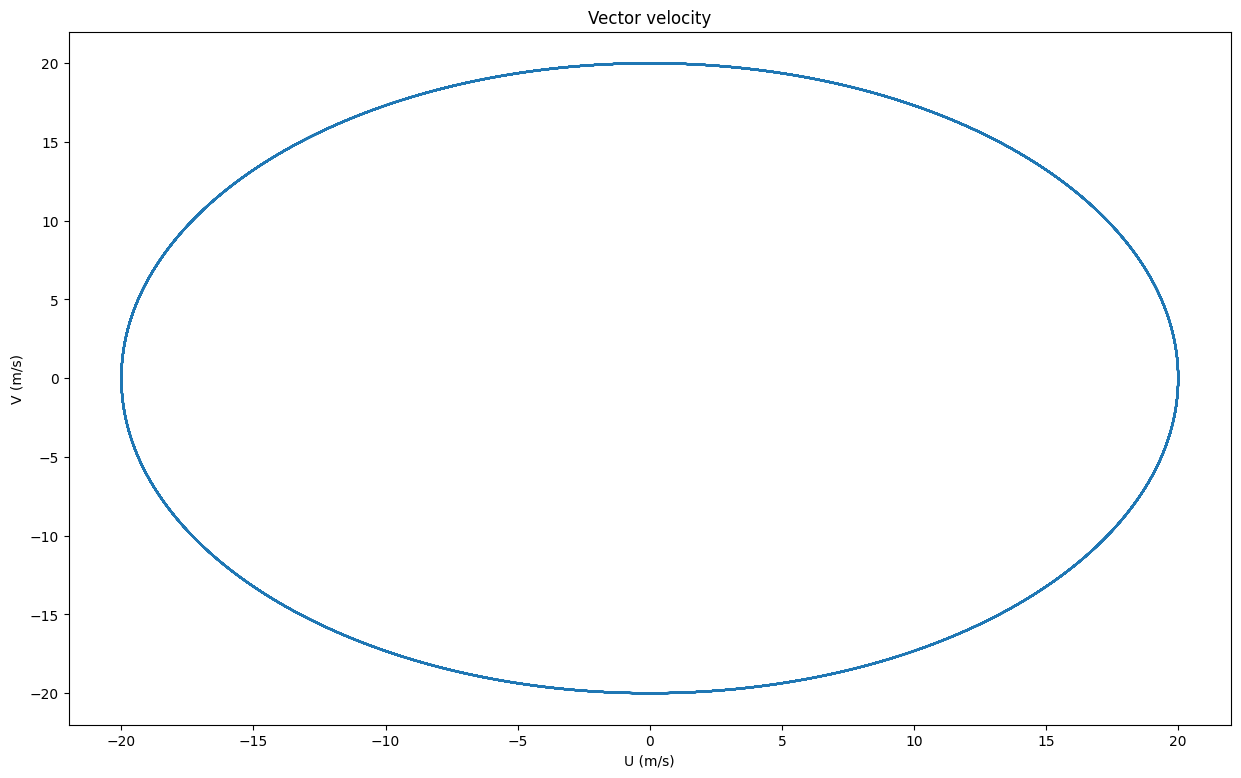

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('V (m/s)')
ax1.set_xlabel('U (m/s)')
ax1.set_title('Vector velocity')
line, = ax1.plot(u,v)
plt.show()

Plot trajectory in latitude & longitude

In [ ]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.set_ylabel('latitude (deg)')
ax2.set_xlabel('longitude (deg)')
ax2.set_title('Position')
line, = ax2.plot(xlon,xlat)
plt.show()

Plot longitude versus time

In [ ]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.set_ylabel('xlon (deg)')
ax2.set_xlabel('t (hours)')
ax2.set_title('Longitude')
line, = ax2.plot(t_in_hours,xlon)
plt.show()

Plot latitude versus time

In [ ]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.set_ylabel('Latitude (deg)')
ax2.set_xlabel('t (hours)')
ax2.set_title('Latitude')
line, = ax2.plot(t_in_hours,xlat)
plt.show()